Group 19: Fernando Trias, Roger Iliffe, HyounJun Park, Siyuan Yin

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


## LoanStats Raw Data

In [2]:
complete = pd.read_pickle("complete.bz2")

## Cleansing Data

In [3]:
public_data_cat = pd.read_pickle("analysis-predictors.bz2")
public_data_y = pd.read_pickle("analysis-target.bz2")

In [4]:
public_data_cat.columns

Index(['loan_amnt', 'term_months', 'int_rate', 'credit_score',
       'emp_length_years', 'annual_inc', 'issue_date', 'dti', 'delinq_2yrs',
       'credit_history_years', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util_perc', 'total_acc', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

## Net Cashflow by Year (Current and Completed)

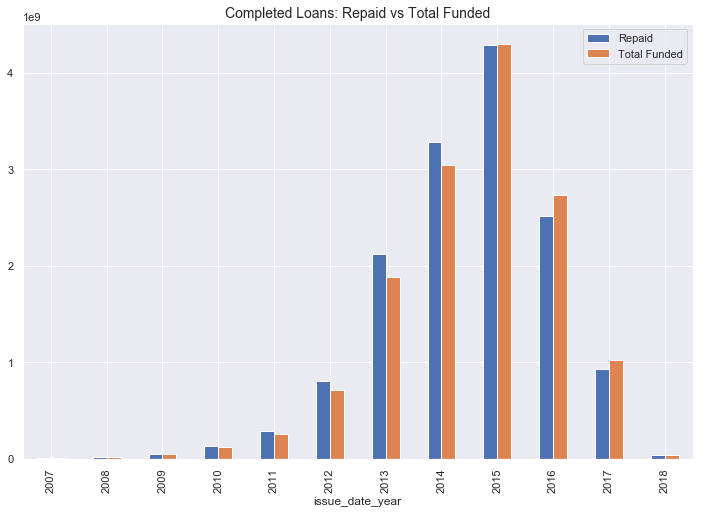

In [5]:
sum1 = complete[["issue_date_year","total_pymnt", "funded_amnt"]].groupby("issue_date_year").sum()

fig, ax = plt.subplots(1,1, figsize=(12,8))

sum1.plot(kind="bar", ax=ax)
ax.set_title("Completed Loans: Repaid vs Total Funded", fontsize=14)
ax.legend(["Repaid", "Total Funded"])

fig.savefig("Net_CashFlow_By_Year.png")

## Apy histogram

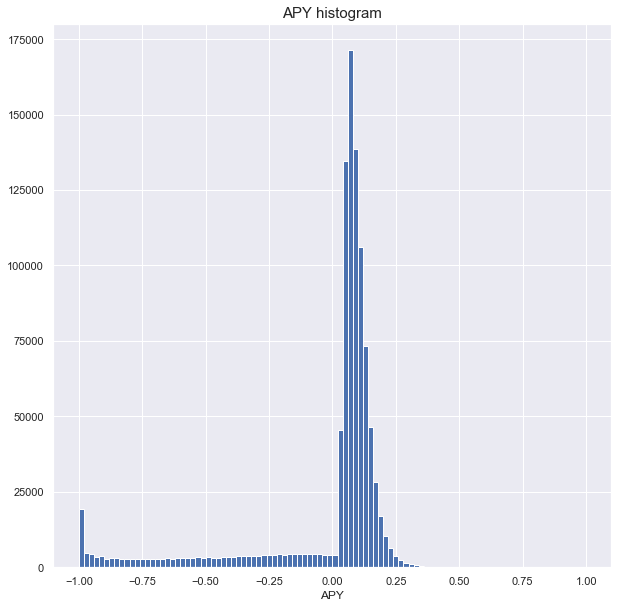

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
public_data_y.hist(range=(-1,1),bins=100)
ax.set_title("APY histogram",fontsize=15)
ax.set_xlabel("APY",fontsize=12)
fig.savefig("APY_histogram.png")

## Does the Year Matter?


In [8]:
cleaned_complete = public_data_cat.copy()
cleaned_complete["apy"] = public_data_y
cleaned_complete["issue_date_year"] = cleaned_complete.issue_date.dt.year

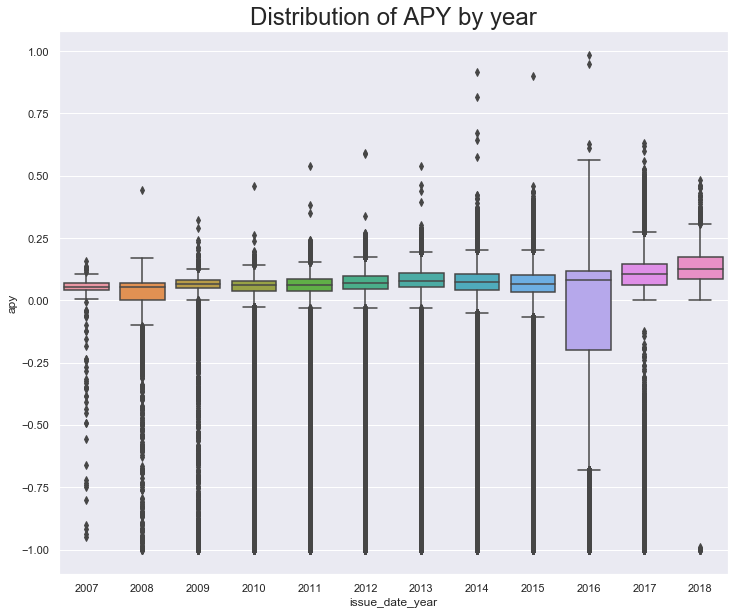

In [9]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
sns.boxplot("issue_date_year", "apy", data = cleaned_complete)
axes.set_title("Distribution of APY by year", fontsize=24);
ax.set_xlabel("Issue year",fontsize=15)
ax.set_ylabel("APY", fontsize=15);
fig.savefig("Distribution_of_APY_by_year.png")

## Profit Loss by LC Credit Score

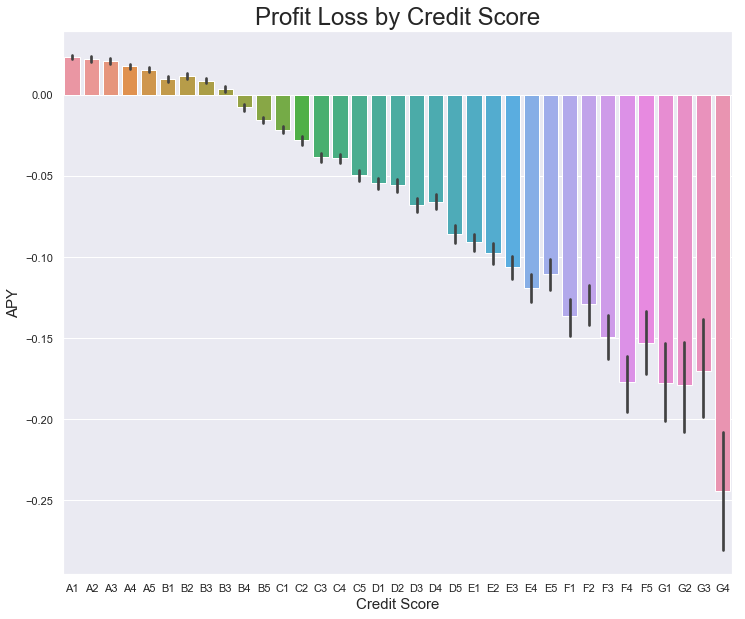

In [11]:
Credit =  ["A1","A2","A3","A4","A5","B1","B2","B3","B3","B4","B5","C1","C2","C3","C4","C5",
         "D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5"
           ,"G1","G2","G3","G4","G5"]

fig, axes = plt.subplots(1,1, figsize=(12,10))
ax = sns.barplot("credit_score", "apy", data = cleaned_complete)
ax.set_title("Profit Loss by Credit Score", fontsize=24)
ax.set_xticklabels(Credit)
ax.set_xlabel("Credit Score",fontsize=15)
ax.set_ylabel("APY", fontsize=15);
fig.savefig("Profit_loss_by_creditscore.png")

In [12]:
df = complete[["addr_state", "funded_amnt"]].groupby("addr_state").sum()
df.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='addr_state')

In [13]:
population = pd.read_csv("pop.csv", sep="\t", index_col=0)
population.head()

,State,Population Ranking,Population
Code,,,
CA,California,1,38332521
TX,Texas,2,26448193
NY,New York,3,19651127
FL,Florida,4,19552860
IL,Illinois,5,12882135


In [14]:
df.head()

,funded_amnt
addr_state,
AK,40228100
AL,171663025
AR,99584325
AZ,331278000
CA,2141095100


In [15]:
df_pop = df.join(population)

In [16]:
z_data = df_pop['funded_amnt'].astype(float) / df_pop.Population.astype(float)
z_data.head()

addr_state
AK    54.722281
AL    35.513632
AR    33.650481
AZ    49.991972
CA    55.855838
dtype: float64

In [17]:
complete["bad_loan"] = (complete.good_loan == 0).astype(float)
df = complete[["addr_state", "good_loan", "bad_loan"]].groupby("addr_state").sum()
df["prop_bad"] = df.bad_loan / (df.good_loan + df.bad_loan)
z_data = df.prop_bad
df.head()

,good_loan,bad_loan,prop_bad
addr_state,,,
AK,1953.0,493.0,0.201554
AL,9245.0,3050.0,0.248068
AR,5578.0,1832.0,0.247233
AZ,19084.0,4841.0,0.202341
CA,117732.0,29601.0,0.200912


In [18]:
import plotly
import plotly.plotly as py
import pandas as pd

plotly.tools.set_credentials_file(username='ftrias', api_key='DcIZCHxlGrkQMXBjF2RM')

def plot_by_state(state, z_data, title_text="States"):
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    data = [ dict(
            type='choropleth',
    #         colorscale = scl,
    #         autocolorscale = False,
            locations = df.index,
            z = z_data,
            locationmode = 'USA-states',
    #         text = df['text'],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "USD")
            ) ]

    layout = dict(
            title = title_text,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    py.image.save_as(fig, filename=title_text)
    return py.iplot( fig, filename='d3-cloropleth-map' )

In [35]:
fig = plot_by_state(df.index, df.prop_bad, "Proportion of Bad Loans Per State.png")


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ftrias/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [29]:
z_data = df_pop['funded_amnt'].astype(float) / df_pop.Population.astype(float)
plot_by_state(df_pop.index, z_data, "Funded Loans per Capita by State.png")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ftrias/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [21]:
def plot_state_mean(column, dfx, title):
    df = dfx[["addr_state", column]].groupby("addr_state").mean()
    return plot_by_state(df.index, df[column], title)
    
def plot_state_sum(column, dfx, title):
    df = dfx[["addr_state", column]].groupby("addr_state").sum()
    return plot_by_state(df.index, df[column], title)

In [30]:
plot_state_mean("apy", complete, "Mean APY by State.png")


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ftrias/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


## Proportion of non-White

In [31]:
data = pd.read_excel('Percent White.xls')


In [32]:
group = data.groupby("AB").mean()

In [33]:
def plot_by_state(state, z_data, title_text="States"):
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    data = [ dict(
            type='choropleth',
    #         colorscale = scl,
    #         autocolorscale = False,
            locations = group.index,
            z = z_data,
            locationmode = 'USA-states',
    #         text = df['text'],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Proportion squared")
            ) ]

    layout = dict(
            title = title_text,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    py.image.save_as(fig, filename=title_text)
    return py.iplot(fig, filename='d3-cloropleth-map')

In [34]:
plot_by_state(group.index, (100-group.Value), "Proportion of Non White By State.png")


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ftrias/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [27]:
s = complete.sample(1000)[['apy','term_months','credit_score', 'emp_length_years'
                         , 'annual_inc', 'dti', 'revol_util_perc']]

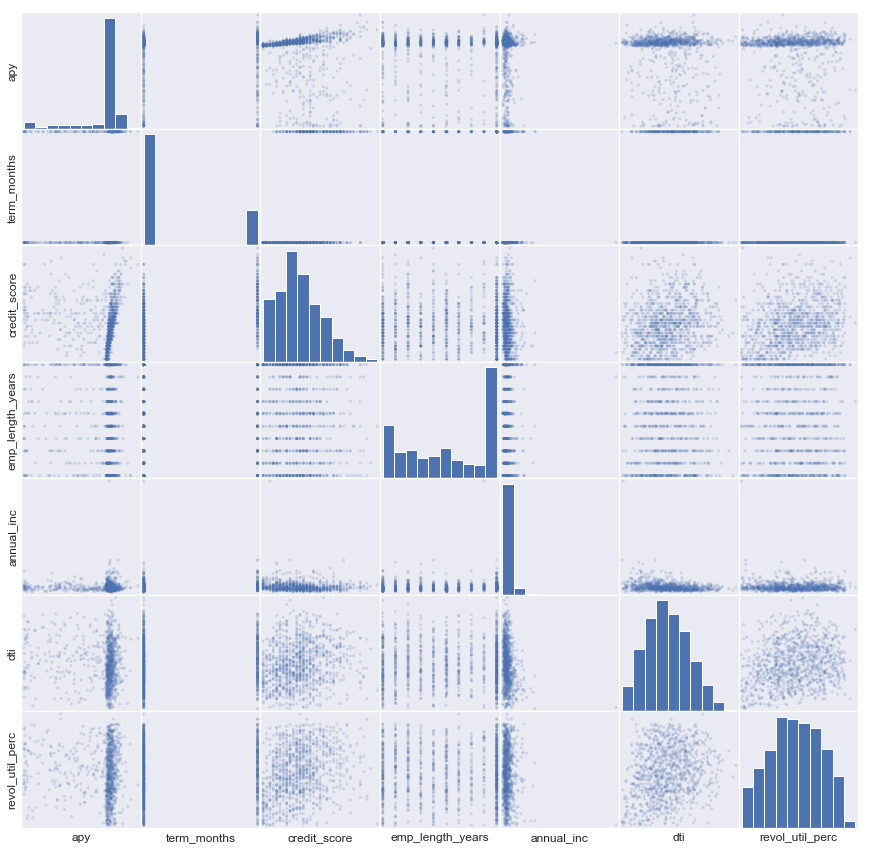

In [28]:

a = pd.plotting.scatter_matrix(s, alpha=0.2, figsize=(15,15))
[s.set_xticks(()) for s in a.reshape(-1)]
[s.set_yticks(()) for s in a.reshape(-1)]
plt.savefig("Predictors_Correlations.png")
